<a href="https://colab.research.google.com/github/Jonata-Garcia/Arvore_de_decisao/blob/main/%C3%81rvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Matriz de confusão detalhada: 
 Predito   0   1   2  Todos
Real                      
0        21   0   0     21
1         0  24   2     26
2         0   1  27     28
Todos    21  25  29     75
Relatório sobre a qualidade:

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        21
  Versicolor       0.96      0.92      0.94        26
   Virgínica       0.93      0.96      0.95        28

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



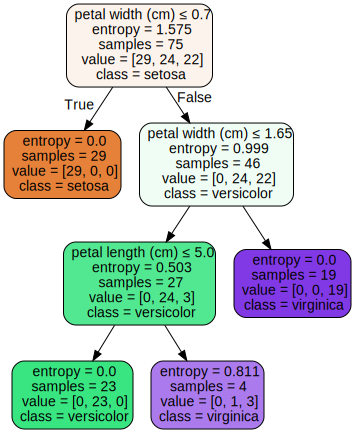

In [ ]:
from posixpath import split
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn.metrics as metrics
import graphviz

iris = load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.50)

clf = tree.DecisionTreeClassifier(criterion ='entropy', max_depth=3)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)



print("\nMatriz de confusão detalhada: \n",pd.crosstab(y_test, predictions, rownames=['Real'], colnames = ['Predito'], margins=True, margins_name='Todos'))

print("Relatório sobre a qualidade:\n")
print(metrics.classification_report(y_test, predictions, target_names=['Setosa', 'Versicolor', 'Virgínica']))

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,
                                class_names=iris.target_names, filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data, format="png")
graph

